<a href="https://colab.research.google.com/github/iorn121/ImageProcessing100Questions/blob/main/ImageProcessing1_10Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

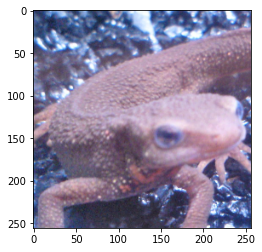

In [2]:
from skimage import io
import numpy as np
import cv2
import matplotlib.pyplot as plt


img_origin=io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png')
plt.imshow(img_origin)
plt.show()

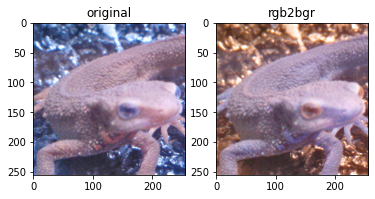

In [3]:
# Q1
def rgb2bgr(img):
  return img[...,::-1]

img_bgr=rgb2bgr(img_origin)
plt.subplot(1,2,1)
plt.imshow(img_origin)
plt.title("original")
plt.subplot(1,2,2)
plt.imshow(img_bgr)
plt.title("rgb2bgr")
plt.show()

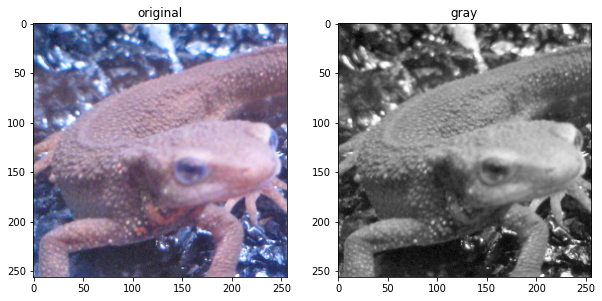

In [4]:
# Q2
# img_gray=cv2.cvtColor(img_origin,cv2.COLOR_RGB2GRAY)
def rgb2gray(img):
  _img=img.copy().astype(np.float32)
  gray=_img[...,0]*0.2126+_img[...,1]*0.7152+_img[...,2]*0.0722
  gray=np.clip(gray,0,255)
  return gray.astype(np.uint8)
img_gray=rgb2gray(img_origin)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_origin)
plt.title("original")
plt.subplot(1,2,2)
plt.imshow(img_gray,cmap="gray")
plt.title("gray")
plt.show()

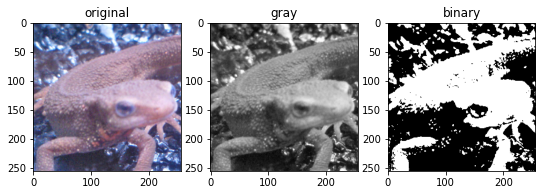

In [5]:
# Q3
# th,img_bin=cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
def binary(img,th):
  _img=img.copy()
  _img=np.minimum(_img//th,1)*255
  return _img.astype(np.uint8)
img_bin=binary(img_gray,127)
plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.imshow(img_origin)
plt.title("original")
plt.subplot(1,3,2)
plt.imshow(img_gray,cmap="gray")
plt.title("gray")
plt.subplot(1,3,3)
plt.imshow(img_bin,cmap="gray")
plt.title("binary")
plt.show()

In [9]:
# Q4
# th,img_bin=cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
def otsu_thresh(img):
  max_var=-1
  max_th=0
  for th in range(1,254):
    m0=img[img<=th].mean()
    m1=img[img>th].mean()
    w0=img[img<=th].size
    w1=img[img>th].size
    var=w0*w1/((w0+w1)**2)*((m0-m1)**2)
    if var>max_var:
      max_var=var
      max_th=th
  img=binary(img,max_th)
  return max_th,img

th,img_bin=otsu_thresh(img_gray)
print("threshold >>",th)

threshold >> 127


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice.
  
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


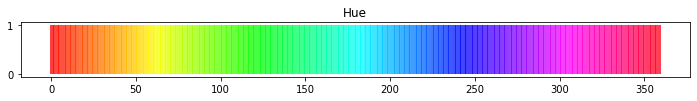

In [12]:
from matplotlib import cm
plt.figure(figsize=(12,1))
plt.title("Hue")
for i in range(360):
  plt.vlines(i,0,1,color=cm.hsv(i/360))

plt.show()

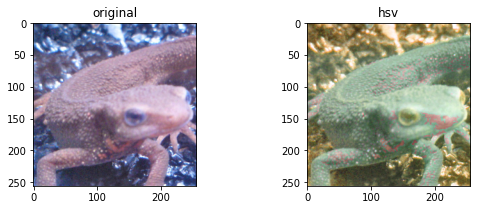

In [13]:
# Q5
hsv=cv2.cvtColor(img_origin,cv2.COLOR_RGB2HSV)
hsv[...,0]=(hsv[...,0]+90)%180
img_hsv=cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.title("original")
plt.imshow(img_origin)
plt.subplot(1,2,2)
plt.title("hsv")
plt.imshow(img_hsv)
plt.show()

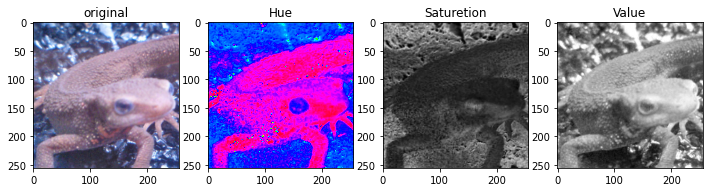

In [14]:
hsv=cv2.cvtColor(img_origin,cv2.COLOR_RGB2HSV)
plt.figure(figsize=(12,3))
plt.subplot(1,4,1)
plt.title("original")
plt.imshow(img_origin)
plt.subplot(1,4,2)
plt.title("Hue")
plt.imshow(hsv[...,0]/360,cmap="hsv")
plt.subplot(1,4,3)
plt.title("Saturetion")
plt.imshow(hsv[...,1],cmap="gray")
plt.subplot(1,4,4)
plt.title("Value")
plt.imshow(hsv[...,2],cmap="gray")
plt.show()